In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
addmission_df= pd.read_csv('Admission_Predict.csv')

In [3]:
addmission_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
addmission_df.drop('Serial No.',axis=1,inplace=True)

In [5]:
addmission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
addmission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [7]:
addmission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
university_df=addmission_df.groupby(by='University Rating').mean()

In [9]:
university_df

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A9E6F9898>,
      dtype=object)

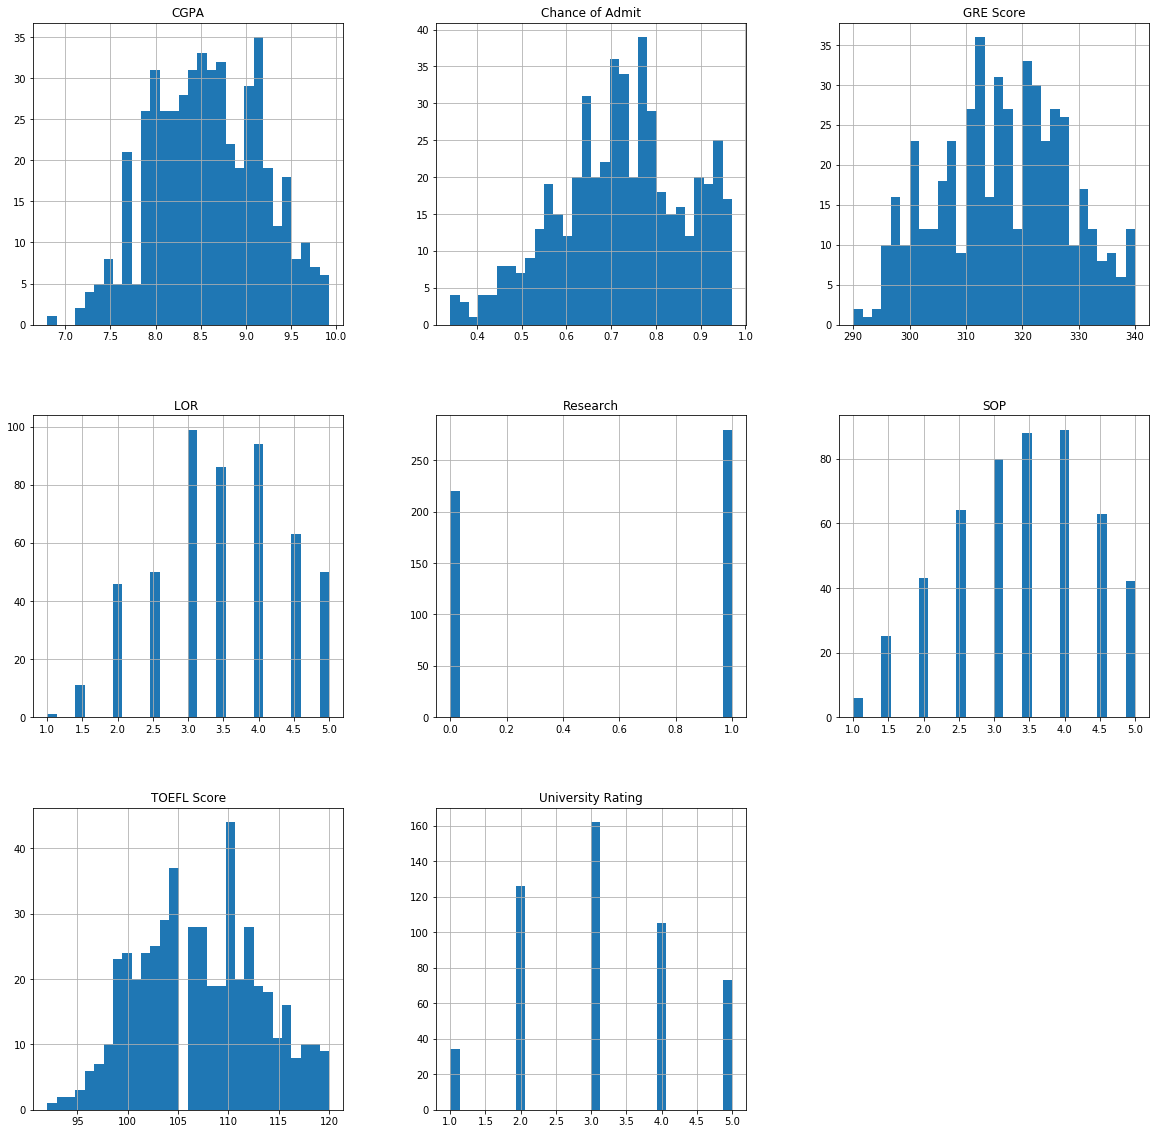

In [10]:
addmission_df.hist(bins=30, figsize=(20,20))

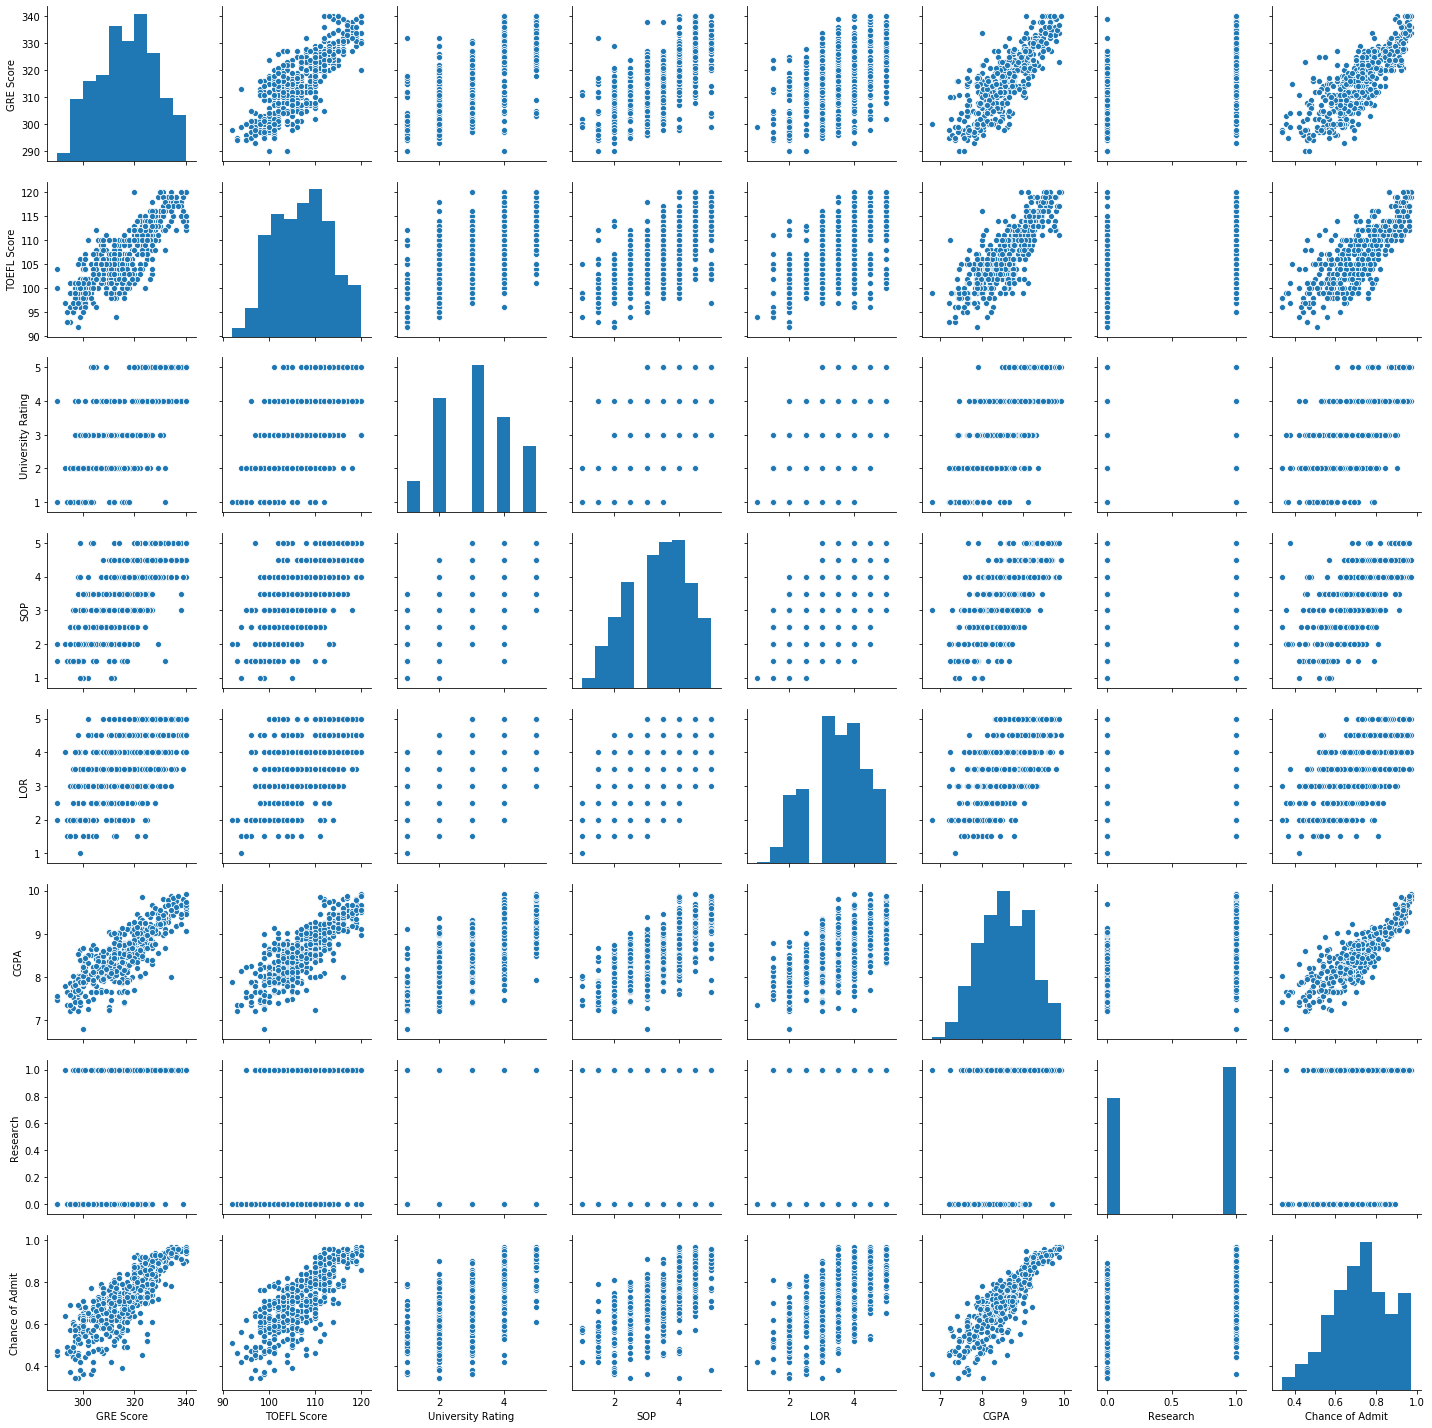

In [11]:
sns.pairplot(addmission_df)

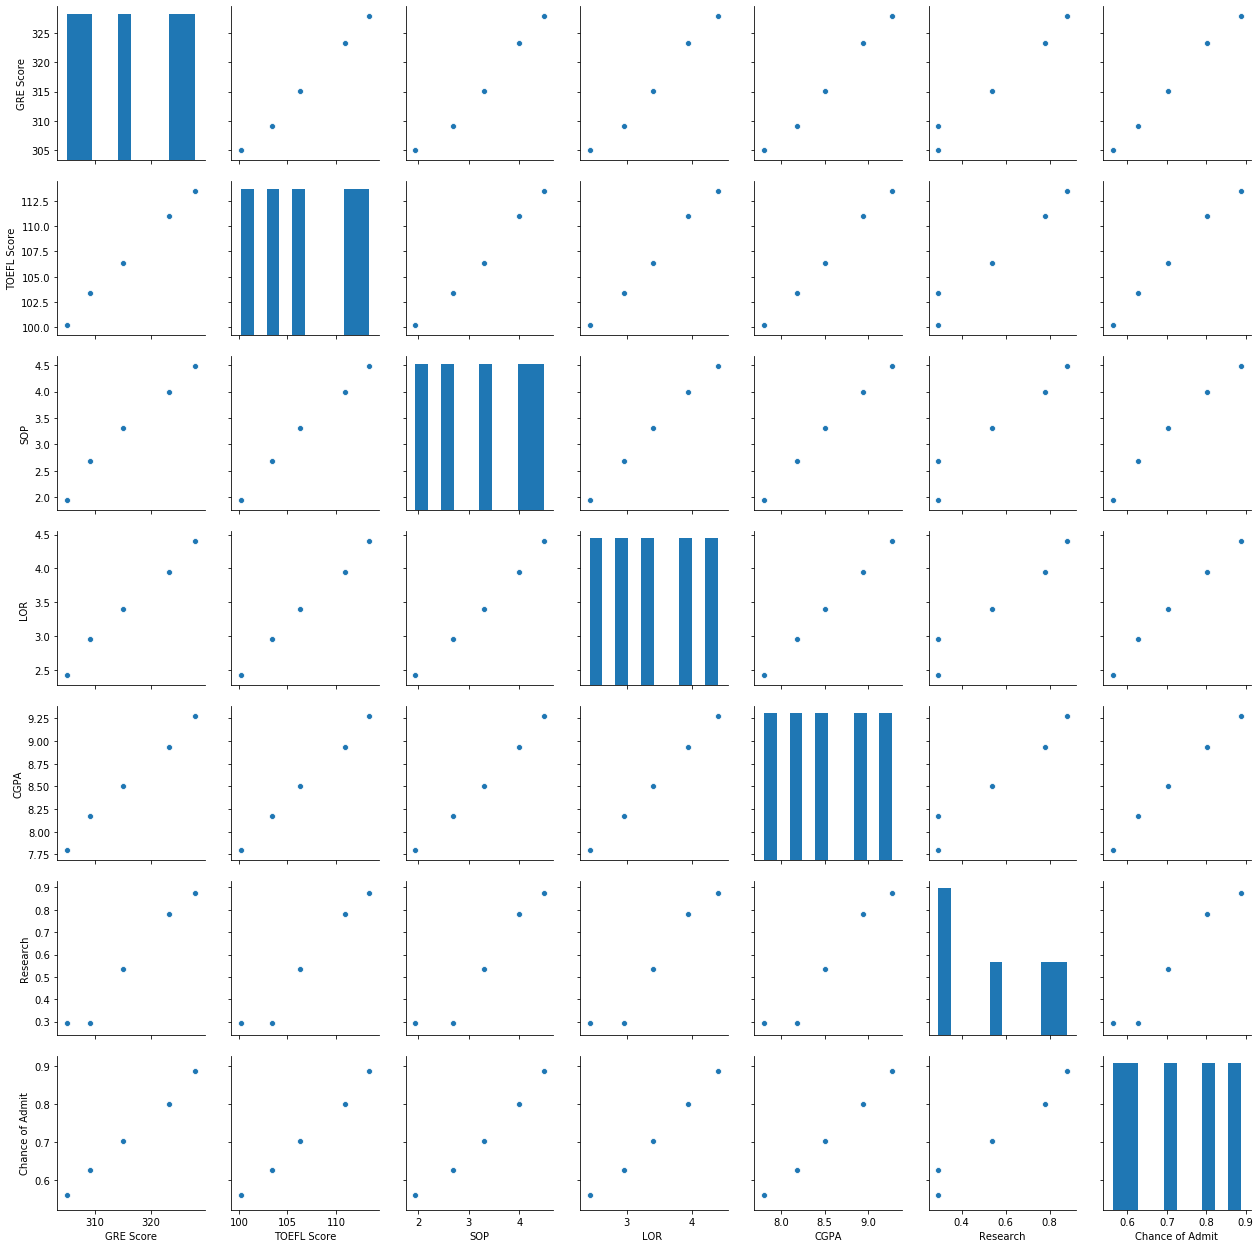

In [12]:
sns.pairplot(university_df)

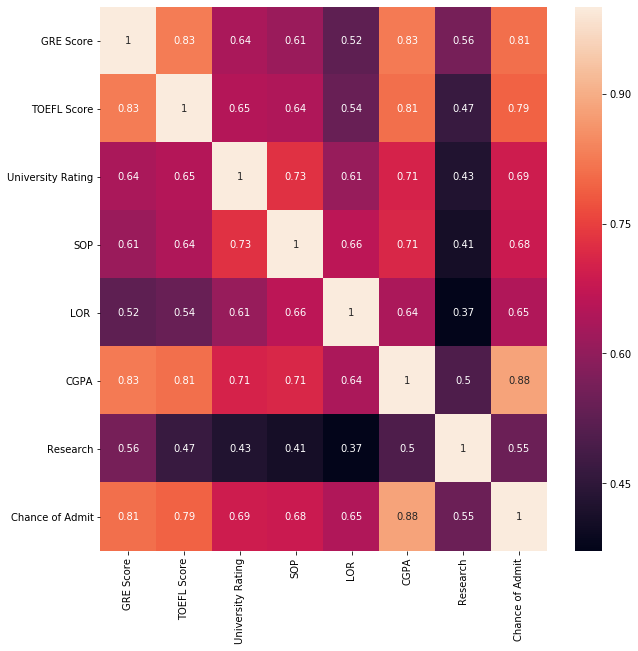

In [13]:
corr_matrix=addmission_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
X=addmission_df.drop(columns=['Chance of Admit'])
y=addmission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
470    0.87
471    0.64
472    0.90
473    0.67
474    0.67
475    0.59
476    0.62
477    0.65
478    0.71
479    0.79
480    0.80
481    0.78
482    0.83
483    0.71
484    0.73
485    0.70
486    0.68
487    0.79
488    0.76
489    0.65
490    0.67
491    0.54
492    0.53
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
y=y.reshape(-1,1)

In [20]:
y.shape

(500, 1)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test , y_train, y_test= train_test_split(X, y , test_size=0.15)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error

In [25]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
accuracy_LinearRegresssion = LinearRegression_model.score(X_test , y_test)

In [27]:
accuracy_LinearRegresssion

0.8623107840483242

In [28]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
Decision_accuracy=DecisionTree_model.score(X_test , y_test)

In [30]:
Decision_accuracy

0.6084511022640844

In [31]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model= RandomForestRegressor(n_estimators=100 , max_depth=10)
RandomForest_model.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
accuracy_RandomForest=RandomForest_model.score(X_test, y_test)

In [33]:
accuracy_RandomForest

0.8523337903505275

In [34]:
y_predict = LinearRegression_model.predict(X_test)

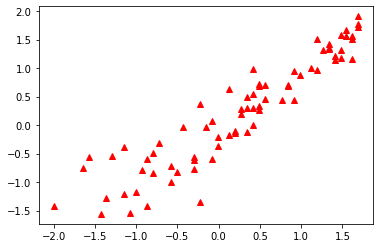

In [35]:
plt.plot(y_test , y_predict , '^', color='r')

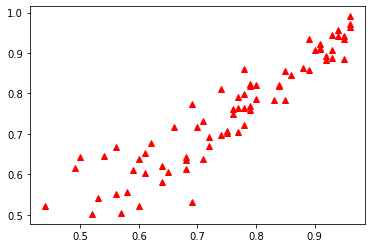

In [36]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig= scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig , y_predict_orig, '^', color='r')

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error
from math import sqrt

In [38]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3f'))
MSE= mean_squared_error(y_test_orig,y_predict_orig)
MAE=mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
k=X_test.shape[1]
n=len(X_test)
adj_r2=1-(1-r2)*(n-1)/(n-k-1)

In [41]:
print('RMSE=',RMSE, '\nMSE=',MSE, '\nMAE=',MAE, '\nR2=', r2, '\nAdjusted r2=',adj_r2)

RMSE= 0.051 
MSE= 0.0025811306095591077 
MAE= 0.03876873103413952 
R2= 0.8623107840483242 
Adjusted r2= 0.847925343575761


In [43]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)
